In [1]:
import numpy  as np
import healpy as hp
import copy
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
%matplotlib inline

# DESI LRG sample #

## Sanity checks on data files ##

Let's take a look at the input data files, maps etc. just as a sanity check on our data.

### Maps ###

Let's take a look at the data and the masks.

In [2]:
isamp = 1
pref  = "lrg_s{:02d}".format(isamp)

0.0 180.0 -180.0 180.0


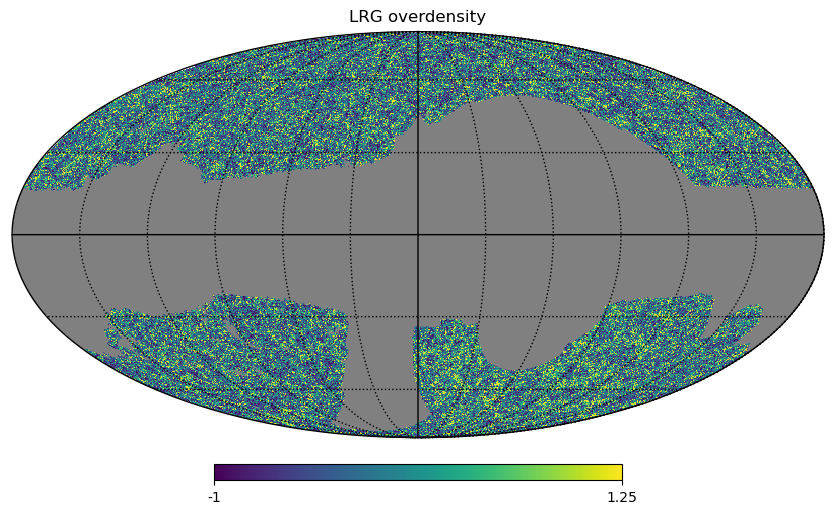

In [3]:
# Let's take a look at some maps.
db ='./'
lrg=hp.read_map(db+pref+'_del.hpx0256.fits',dtype=None,verbose=False)
msk=hp.read_map(db+pref+'_msk.hpx0256.fits',dtype=None,verbose=False)
#
cmap = copy.copy(get_cmap("viridis"))
#
lrg=hp.ma(lrg)
lrg.mask=(msk<0.5)
hp.mollview(lrg,title='LRG overdensity',cmap=cmap,min=-1,max=1.25)
hp.graticule(coord='G',verbose=False)
#
#plt.savefig(pref+'_overdensity_gal.png')

0.0 180.0 -180.0 180.0


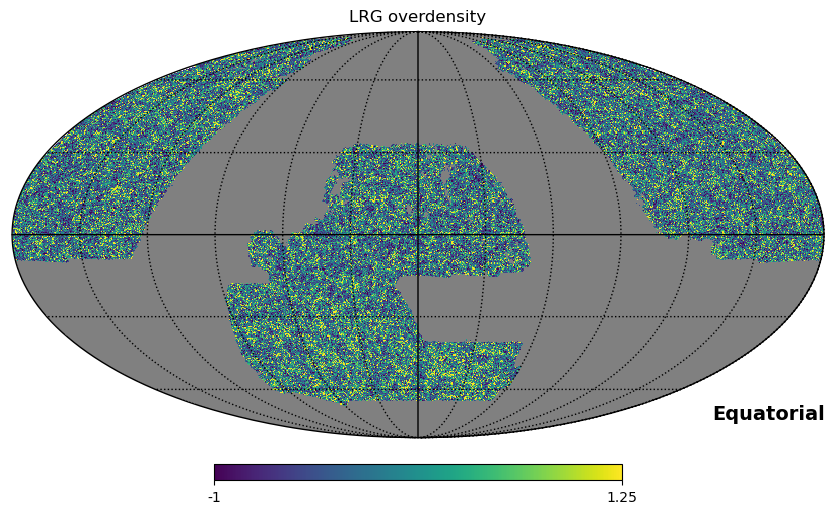

In [4]:
# Just check it also in equatorial.
hp.mollview(lrg,title='LRG overdensity',cmap=cmap,min=-1,max=1.25,coord=['G','C'])
hp.graticule(coord='C',verbose=False)
#plt.savefig(pref+'_overdensity_equ.png')

## Redshift distribution

Now take a look at the redshift distributions.

Text(0, 0.5, '$dN/dz$')

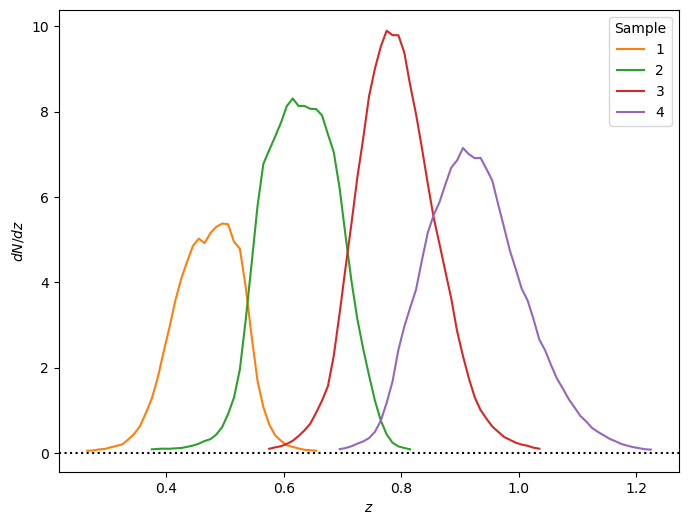

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
#
for isamp in [1,2,3,4]:
    dd = np.loadtxt("lrg_s{:02d}_dndz.txt".format(isamp))
    ax.plot(dd[:,0],dd[:,1],ls='-',color='C'+str(isamp),label=str(isamp))
ax.axhline(0.0,ls=':',color='k')
ax.legend(title='Sample')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$dN/dz$')
#

In [6]:
# and the CMB convergence
#db ='/global/cscratch1/sd/mwhite/DESI/LRGx/prepare/'
#kap=hp.read_map(db+'P18_lens_kap_filt.hpx2048.fits',dtype=None,verbose=False)
#kap=hp.ud_grade(kap,256)
#
#msk=hp.read_map(db+'P18_lens_msk.hpx2048.fits',dtype=None,verbose=False)
#msk=hp.ud_grade(msk,256)
#
#kap=hp.ma(kap)
#kap.mask=(msk<0.5)
#hp.mollview(kap,title=r'CMB $\kappa$',cmap=cmap,min=-1.5,max=1.5)
#hp.graticule(coord='G',verbose=False)
#
#plt.savefig('cmb_kap.hpx.pdf')

In [7]:
# and the NoSZ-CMB convergence
#db ='/global/cscratch1/sd/mwhite/DESI/LRGx/prepare/'
#kap=hp.read_map(db+'P18_nosz_kap_filt.hpx2048.fits',dtype=None,verbose=False)
#kap=hp.ud_grade(kap,256)
#
#msk=hp.read_map(db+'P18_nosz_msk.hpx2048.fits',dtype=None,verbose=False)
#msk=hp.ud_grade(msk,256)
#
#kap=hp.ma(kap)
#kap.mask=(msk<0.5)
#hp.mollview(kap,title=r'NoSZ CMB $\kappa$',cmap=cmap,min=-1.5,max=1.5)
#hp.graticule(coord='G',verbose=False)
#
#plt.savefig('cmb_convergence.png')

## The end